In [1]:
# modulos
from itertools import product, permutations, combinations, combinations_with_replacement
from math import factorial
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, poisson, expon, norm

# dados
dados_acidentes = pd.read_csv('acidentes.csv')
dados_vinho = pd.read_csv('vinho_nacional.csv', sep=';', decimal=',')

In [2]:
# criar a formula no python
def formula_permutacao(n, k, repeticao=False):
    if repeticao is True:
        #usamos o fatorial pois caso possa repetir os numeros na senha, o problema seria so fazer o fatorial da quantidade de digitos, mas como nao pode repetir usamos a formula de COMBINACAO sem repeticao
        return n ** k
    else:
        return factorial(n) / factorial(n - k)
        #vai retornar a quantidade de senhas possiveis para serem formadas

# obter o numero de permutacoes
elementos = 10
escolhas = 6
formula_permutacao(n=elementos, k=escolhas, repeticao=False)


151200.0

In [3]:
# POSSIVEIS COMBINACOES DA MEGA SENA
def formula_combinacao(n, k, repeticao=False):
    if repeticao is False:
        return factorial(n) / (factorial(k) * factorial(n - k))
        #formula do exemplo anterior, quando nao puder repetir
    else:
        return factorial(n + k - 1) / (factorial(k) * factorial(n - 1))

# aplicar a formula
n = 60
k = 6
formula_combinacao(n, k)


50063860.0

In [8]:
# ajuste da data
dados_acidentes['data_acidente'] = pd.to_datetime(dados_acidentes['data_acidente'], errors='coerce')
dados_acidentes['data_acidente_mensal'] = dados_acidentes['data_acidente'].dt.strftime('%Y-%m')

# contagem do numero de acidentes por dia
dados_acidentes_mensal = dados_acidentes.groupby('data_acidente_mensal').size().to_frame('n').reset_index()

# ordenar por data_acidente_mensal em ordem crescente
dados_acidentes_mensal = dados_acidentes_mensal.sort_values(by='n', ascending=True)

print(dados_acidentes_mensal)


   data_acidente_mensal   n
0               2013-07   1
49              2018-01   2
42              2017-06   2
43              2017-07   3
39              2017-03   3
53              2018-05   3
20              2015-08   4
25              2016-01   4
21              2015-09   4
28              2016-04   5
52              2018-04   5
48              2017-12   5
45              2017-09   5
37              2017-01   6
41              2017-05   6
44              2017-08   6
24              2015-12   6
23              2015-11   6
6               2014-06   6
7               2014-07   6
18              2015-06   6
17              2015-05   7
47              2017-11   7
50              2018-02   7
12              2014-12   7
9               2014-09   7
19              2015-07   8
40              2017-04   8
5               2014-05   8
35              2016-11   8
13              2015-01   8
14              2015-02   8
11              2014-11   8
36              2016-12   9
10              2014

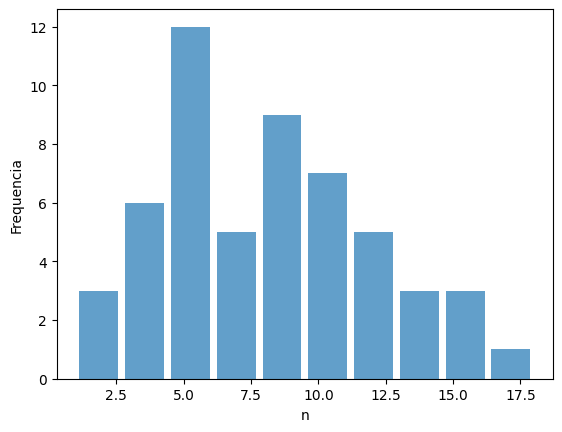

In [9]:
import matplotlib.pyplot as plt

# histograma com matplotlib
plt.hist(dados_acidentes_mensal['n'], alpha=0.7, rwidth=0.85)
plt.xlabel('n')
plt.ylabel('Frequencia')
plt.show()


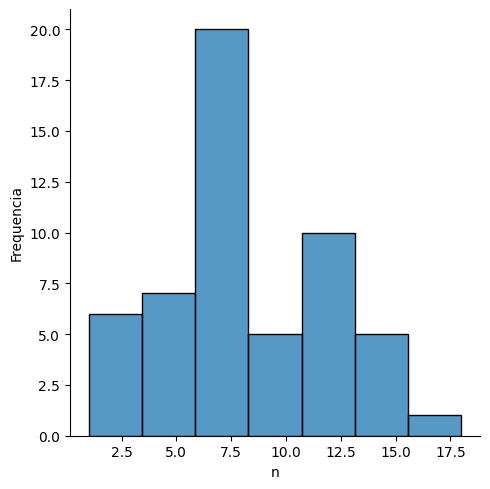

In [10]:
import seaborn as sns

# histograma com seaborn
sns.displot(dados_acidentes_mensal['n'])
plt.ylabel('Frequencia')
plt.show()


In [ ]:
n = 50
p = 0.05
x = 5
result_1 = binom.pmf(k=x, n=n, p=p)
print("Problem 1 Result:", result_1)


n = 50
p = 0.05
x = 5
result_1 = binom.pmf(k=x, n=n, p=p)
print("Problem 1 Result:", result_1)


In [ ]:
n = 70
p = 0.02
x = 4
result_2 = binom.pmf(k=x, n=n, p=p)
print("Problem 2 Result:", result_2)


In [ ]:
import numpy as np

n = 200
p = 0.03
x = [7, 8, 9, 10]
result_3 = np.sum(binom.pmf(k=x, n=n, p=p))
print("Problem 3 Result:", result_3)


In [11]:
# obter media mensal
media_mensal = np.mean(dados_acidentes_mensal['n'])

# probabilidade 7 acidentes
poisson.pmf(k=7, mu=media_mensal)

# probabilidade 4 a 6 acidentes
n_acidentes = np.arange(4, 7)
np.sum(poisson.pmf(k=n_acidentes, mu=media_mensal))


0.2555945240092576

In [12]:
aposentadoria = 65
x = aposentadoria + 15
tempo_medio_vida = 70
result_1 = 1 - expon.cdf(x=x, scale=tempo_medio_vida)
print("Problem 1 Result:", result_1)


Problem 1 Result: 0.31890655732397044


In [13]:
x = 3
tempo_medio_vida = 2
result_2 = 1 - expon.cdf(x=x, scale=tempo_medio_vida)
print("Problem 2 Result:", result_2)


Problem 2 Result: 0.2231301601484298


In [14]:
tempo_medio_vida = 1
x_3anos = 3
x_5anos = 5
result_3 = expon.cdf(x=x_5anos, scale=tempo_medio_vida) - expon.cdf(x=x_3anos, scale=tempo_medio_vida)
print("Problem 3 Result:", result_3)


Problem 3 Result: 0.043049121368778476


In [15]:
# media e desvio padrao
media_mensal_vinho = np.mean(dados_vinho['vendas_vinho_nacional'])
dp_mensal_vinho = np.std(dados_vinho['vendas_vinho_nacional'])
media_mensal_vinho, dp_mensal_vinho


(339.05, 7.116705698565875)

In [16]:
# problema 1
p_330 = norm.cdf(x=330, loc=media_mensal_vinho, scale=dp_mensal_vinho)
p_370 = norm.cdf(x=370, loc=media_mensal_vinho, scale=dp_mensal_vinho)
result_problem_1 = p_370 - p_330
print("Problem 1 Result:", result_problem_1)


Problem 1 Result: 0.8982454369037137


In [17]:
# problema 2
p_370 = norm.cdf(x=370, loc=media_mensal_vinho, scale=dp_mensal_vinho)
result_problem_2 = 1 - p_370
print("Problem 2 Result:", result_problem_2)


Problem 2 Result: 6.840408958486144e-06
